In [16]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json

In [46]:
flex_dir = "oct21/seed_5/dynamic/"
minimal_dir = "oct21/seed_5/min/"
maximal_dir = "oct21/seed_5/max/"

In [47]:
def string_to_list(string):
    string = string[1:-1]
    string = string.replace(" ", "")
    res = string.split(",")
    return [float(x) for x in res]    

def combine_lists(attribute_list, folder_name):
    res = []
    for file in attribute_list:
        with open(folder_name+file, "r") as infile:
            data = infile.read()
            res.append(string_to_list(data))
    return res

def mean_min_max(list_of_lists):
    _mean = []
    _min = []
    _max = []
    for elements in zip(*list_of_lists):
        _min.append(min(elements))
        _max.append(max(elements))
        _mean.append(sum(elements)/len(elements))
    return _mean, _min, _max  

In [48]:
def plot_in_between(mean_min_max_list):
    _x = list(range(len(mean_min_max_list[0])))
    _y_mean = mean_min_max_list[0]
    _y_min = mean_min_max_list[1]
    _y_max = mean_min_max_list[2]
    plt.plot(_x, _y_mean)
    plt.fill_between(_x, _y_min, _y_max, alpha=0.3)
    plt.show()

def plot_by_metric(metric):
    metric_list_flex = [path for path in os.listdir(flex_dir) if metric in path]
    metric_list_min = [path for path in os.listdir(minimal_dir) if metric in path]
    metric_list_max = [path for path in os.listdir(maximal_dir) if metric in path]
    
    _y_flex_mean, _y_flex_min, _y_flex_max = mean_min_max(combine_lists(metric_list_flex, flex_dir))
    _y_min_mean, _y_min_min, _y_min_max = mean_min_max(combine_lists(metric_list_min, minimal_dir))
    _y_max_mean, _y_max_min, _y_max_max = mean_min_max(combine_lists(metric_list_max, maximal_dir))
    _x = list(range(len(_y_flex_mean)))
    
    plt.plot(_x, _y_flex_mean, color="blue")
    plt.plot(_x, _y_min_mean, color="green")
    plt.plot(_x, _y_max_mean, color="red")
    
    plt.fill_between(_x, _y_flex_min, _y_flex_max, alpha=0.3, color="blue", label="dynamic")
    plt.fill_between(_x, _y_min_min, _y_min_max, alpha=0.3, color="green", label="min")
    plt.fill_between(_x, _y_max_min, _y_max_max, alpha=0.3, color="red", label="max")
    plt.legend(loc="best")
    plt.title(metric)
    
    
    plt.show()
    
    
def plot_trajectory(last_ten_trajectories):
    for run in last_ten_trajectories:
        _xs = []
        _ys = []
        for coordinate in run[:-1]:
            _xs.append(coordinate[0])
            _ys.append(coordinate[1])
        plt.plot(_xs, _ys)
    plt.show()
            
            
    

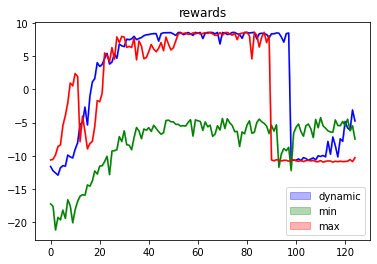

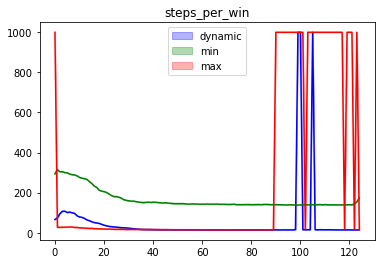

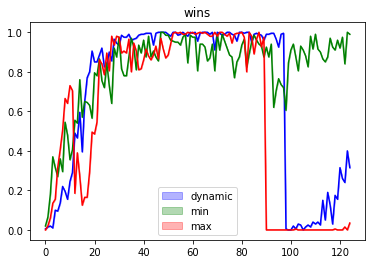

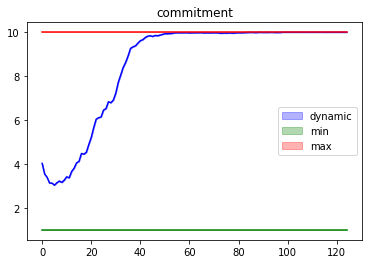

In [49]:
plot_by_metric("rewards")
plot_by_metric("steps_per_win")
plot_by_metric("wins")
plot_by_metric("commitment")

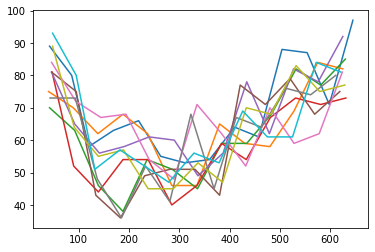

In [54]:
test_str="[[[42, 89], [86, 80], [120, 58], [169, 63], [219, 66], [263, 55], [311, 53], [360, 54], [410, 64], [458, 61], [504, 88], [554, 87], [598, 71], [645, 97], [0, 100]], [[40, 75], [89, 70], [138, 62], [188, 68], [237, 62], [285, 46], [335, 46], [380, 65], [430, 59], [480, 58], [528, 69], [575, 84], [625, 82], [0, 100]], [[42, 70], [92, 63], [139, 46], [188, 38], [236, 54], [286, 51], [336, 45], [384, 59], [434, 59], [483, 68], [532, 82], [581, 77], [630, 85], [0, 100]], [[47, 81], [90, 52], [139, 44], [188, 54], [238, 54], [285, 40], [335, 46], [384, 59], [433, 54], [481, 67], [531, 73], [581, 71], [631, 73], [0, 100]], [[46, 81], [92, 65], [141, 56], [190, 58], [240, 61], [290, 60], [337, 49], [387, 56], [434, 78], [479, 62], [527, 82], [576, 78], [625, 92], [0, 100]], [[46, 81], [95, 75], [134, 43], [183, 36], [231, 49], [281, 51], [331, 51], [380, 43], [421, 77], [471, 71], [520, 79], [569, 68], [619, 75], [0, 100]], [[46, 84], [94, 72], [144, 67], [194, 68], [240, 54], [289, 48], [335, 71], [384, 62], [432, 52], [480, 70], [528, 59], [578, 62], [624, 81], [0, 100]], [[43, 73], [93, 73], [137, 48], [185, 36], [233, 52], [281, 41], [323, 68], [369, 45], [413, 67], [463, 64], [512, 76], [561, 74], [611, 80], [0, 100]], [[48, 89], [91, 64], [139, 55], [189, 57], [238, 45], [288, 45], [337, 53], [386, 47], [433, 70], [482, 68], [532, 83], [579, 75], [629, 77], [0, 100]], [[48, 93], [95, 80], [132, 51], [182, 57], [231, 52], [279, 47], [329, 56], [379, 53], [426, 69], [475, 61], [525, 61], [572, 84], [621, 81], [0, 100]]]"
plot_trajectory(json.loads(test_str))